# House Rent Estimation System:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Mumbai_House_Rent.csv")
df.head(10)

,Locality,Type,Rent/Month,Build_up_area(sq.ft),Furnishing,Bathrooms,Balcony,Parking,Carpet_area(sq.ft)
0,Andheri,1 RK Apartment,20000,350 sq.ft,Semi Furnished,1,Missing,0.0,250 sq.ft
1,Andheri,3 BHK Apartment,100000,1850 sq.ft,Semi Furnished,3,1,2.0,1400 sq.ft
2,Andheri,2 BHK Apartment,45000,1240 sq.ft,Semi Furnished,2,4,1.0,850 sq.ft
3,Andheri,1 BHK Apartment,31500,650 sq.ft,Unfurnished,2,Missing,1.0,425 sq.ft
4,Andheri,2 BHK Apartment,44000,1250 sq.ft,Unfurnished,2,3,1.0,800 sq.ft
5,Andheri,3 BHK Apartment,65000,1050 sq.ft,Fully Furnished,3,Missing,2.0,850 sq.ft
6,Andheri,3 BHK Apartment,72000,1377 sq.ft,Semi Furnished,2,2,1.0,889 sq.ft
7,Andheri,2 BHK Apartment,52000,1200 sq.ft,Semi Furnished,2,2,1.0,710 sq.ft
8,Andheri,3 BHK Apartment,100000,2200 sq.ft,Fully Furnished,3,4,2.0,1600 sq.ft
9,Andheri,3 BHK Apartment,55000,1350 sq.ft,Unfurnished,2,2,1.0,1064 sq.ft


In [3]:
df.shape

(15386, 9)

In [4]:
missing_data=df.isnull().sum()
missing_data

Locality                 0
Type                     0
Rent/Month               0
Build_up_area(sq.ft)     0
Furnishing               0
Bathrooms                0
Balcony                  0
Parking                 35
Carpet_area(sq.ft)       0
dtype: int64

In [5]:
df['Build_up_area(sq.ft)'] = df['Build_up_area(sq.ft)'].str.replace(' sq.ft', '', regex=False).replace('Missing', np.nan).astype(float)
df['Carpet_area(sq.ft)'] = df['Carpet_area(sq.ft)'].str.replace(' sq.ft', '', regex=False).replace('Missing', np.nan).astype(float)
df['Type'] = df['Type'].str.extract('^(\d+)').replace('Missing', np.nan).astype(float)
df.replace("Missing", np.nan, inplace=True)
df['Balcony']=df['Balcony'].astype(float)
df['Bathrooms']=df['Bathrooms'].astype(float)
df.head(10)
#We converted the ones that say 'Missing' to 'NaN' data. It should be null instead of string value.

,Locality,Type,Rent/Month,Build_up_area(sq.ft),Furnishing,Bathrooms,Balcony,Parking,Carpet_area(sq.ft)
0,Andheri,1.0,20000,350.0,Semi Furnished,1.0,NaN,0.0,250.0
1,Andheri,3.0,100000,1850.0,Semi Furnished,3.0,1.0,2.0,1400.0
2,Andheri,2.0,45000,1240.0,Semi Furnished,2.0,4.0,1.0,850.0
3,Andheri,1.0,31500,650.0,Unfurnished,2.0,NaN,1.0,425.0
4,Andheri,2.0,44000,1250.0,Unfurnished,2.0,3.0,1.0,800.0
5,Andheri,3.0,65000,1050.0,Fully Furnished,3.0,NaN,2.0,850.0
6,Andheri,3.0,72000,1377.0,Semi Furnished,2.0,2.0,1.0,889.0
7,Andheri,2.0,52000,1200.0,Semi Furnished,2.0,2.0,1.0,710.0
8,Andheri,3.0,100000,2200.0,Fully Furnished,3.0,4.0,2.0,1600.0
9,Andheri,3.0,55000,1350.0,Unfurnished,2.0,2.0,1.0,1064.0


In [6]:
missing_data=df.isnull().sum()
missing_data

Locality                   0
Type                       0
Rent/Month                 0
Build_up_area(sq.ft)       0
Furnishing                 0
Bathrooms                404
Balcony                 9272
Parking                   35
Carpet_area(sq.ft)      2116
dtype: int64

In [7]:
df.dtypes

Locality                 object
Type                    float64
Rent/Month                int64
Build_up_area(sq.ft)    float64
Furnishing               object
Bathrooms               float64
Balcony                 float64
Parking                 float64
Carpet_area(sq.ft)      float64
dtype: object

In [8]:
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent.sort_values(ascending=False)) 
# No columns with more than 80% empty data. No need to delete

Balcony                 60.262576
Carpet_area(sq.ft)      13.752762
Bathrooms                2.625764
Parking                  0.227480
Locality                 0.000000
Type                     0.000000
Rent/Month               0.000000
Build_up_area(sq.ft)     0.000000
Furnishing               0.000000
dtype: float64


Text(0.5, 1.0, 'Distribution of Barhrooms Column')

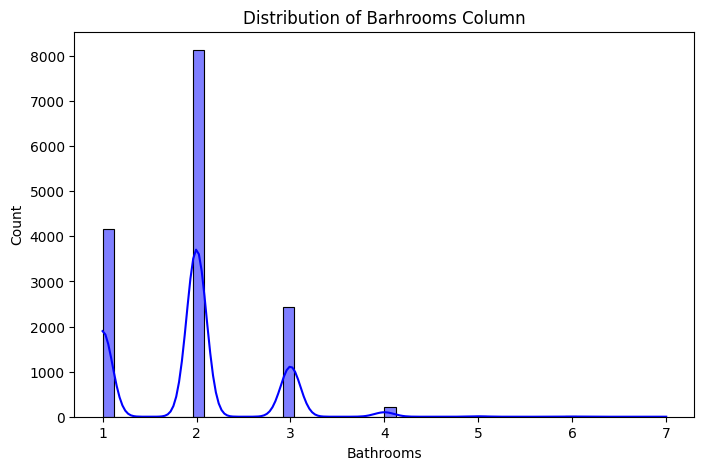

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["Bathrooms"], bins=50, kde=True, color="blue")  
plt.xlabel("Bathrooms")
plt.title("Distribution of Barhrooms Column") # Histogram and density curve

In [10]:
median_br=df['Bathrooms'].median()
avg_br=df['Bathrooms'].mean()
mod_br=df['Bathrooms'].mode()
median_br,avg_br,mod_br 
#Nearly same. We can use 2 (MEDIAN, MODE) for filling

(2.0,
 1.920504605526632,
 0    2.0
 dtype: float64)

In [11]:
df["Bathrooms"] = df["Bathrooms"].fillna(df["Bathrooms"].median())
df["Bathrooms"]

0        1.0
1        3.0
2        2.0
3        2.0
4        2.0
        ... 
15381    1.0
15382    3.0
15383    2.0
15384    4.0
15385    4.0
Name: Bathrooms, Length: 15386, dtype: float64

In [12]:
missing_data=df.isnull().sum()
missing_data

Locality                   0
Type                       0
Rent/Month                 0
Build_up_area(sq.ft)       0
Furnishing                 0
Bathrooms                  0
Balcony                 9272
Parking                   35
Carpet_area(sq.ft)      2116
dtype: int64

Text(0.5, 1.0, 'Distribution of Balcony Column')

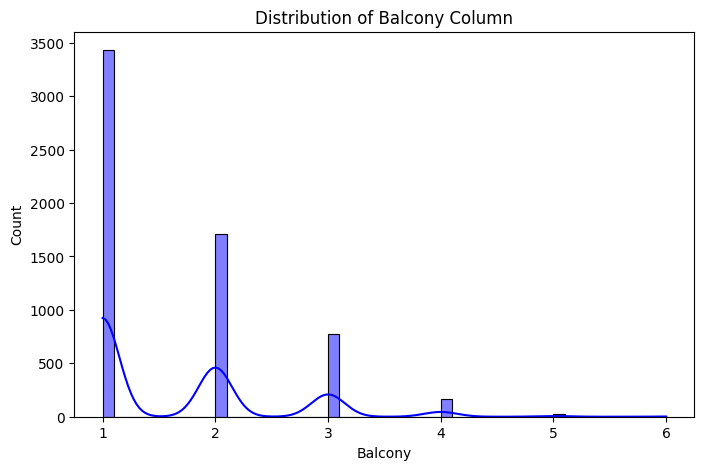

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df["Balcony"], bins=50, kde=True, color="blue")  
plt.xlabel("Balcony")
plt.title("Distribution of Balcony Column") # Histogram and density curve

In [14]:
median_bc=df['Balcony'].median()
avg_bc=df['Balcony'].mean()
mod_bc=df['Balcony'].mode()
median_bc,avg_bc,mod_bc 
#Nearly same. We can use 1 (MEDIAN, MODE) for filling

(1.0,
 1.636571802420674,
 0    1.0
 dtype: float64)

In [15]:
df["Balcony"] = df["Balcony"].fillna(df["Balcony"].median())
df["Balcony"]
#df.drop('Balcony', axis=1, inplace=True)

0        1.0
1        1.0
2        4.0
3        1.0
4        3.0
        ... 
15381    1.0
15382    2.0
15383    3.0
15384    2.0
15385    2.0
Name: Balcony, Length: 15386, dtype: float64

In [16]:
missing_data=df.isnull().sum()
missing_data

Locality                   0
Type                       0
Rent/Month                 0
Build_up_area(sq.ft)       0
Furnishing                 0
Bathrooms                  0
Balcony                    0
Parking                   35
Carpet_area(sq.ft)      2116
dtype: int64

Text(0.5, 1.0, 'Distribution of Parking Column')

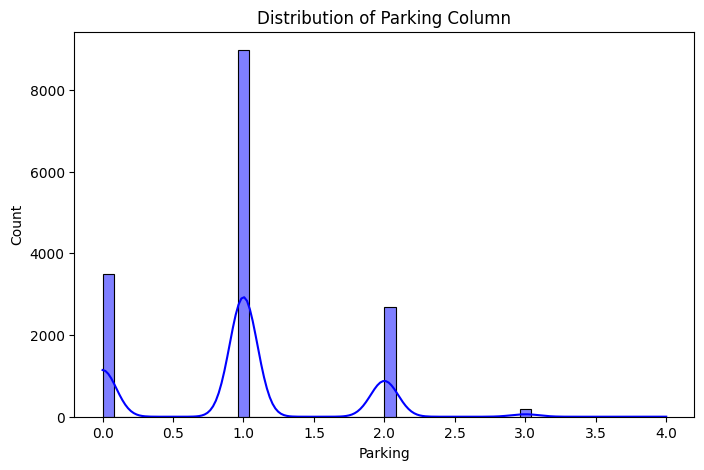

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df["Parking"], bins=50, kde=True, color="blue")  
plt.xlabel("Parking")
plt.title("Distribution of Parking Column") # Histogram and density curve

In [18]:
#There is no need to calculate the value. It is visible in the graph (like the examples above). We will use the Mode value.
df["Parking"] = df["Parking"].fillna(df["Parking"].median())
df["Parking"]

0        0.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
15381    0.0
15382    3.0
15383    1.0
15384    2.0
15385    2.0
Name: Parking, Length: 15386, dtype: float64

In [19]:
missing_data=df.isnull().sum()
missing_data

Locality                   0
Type                       0
Rent/Month                 0
Build_up_area(sq.ft)       0
Furnishing                 0
Bathrooms                  0
Balcony                    0
Parking                    0
Carpet_area(sq.ft)      2116
dtype: int64

Text(0.5, 1.0, 'Distribution of Carpet Area Column')

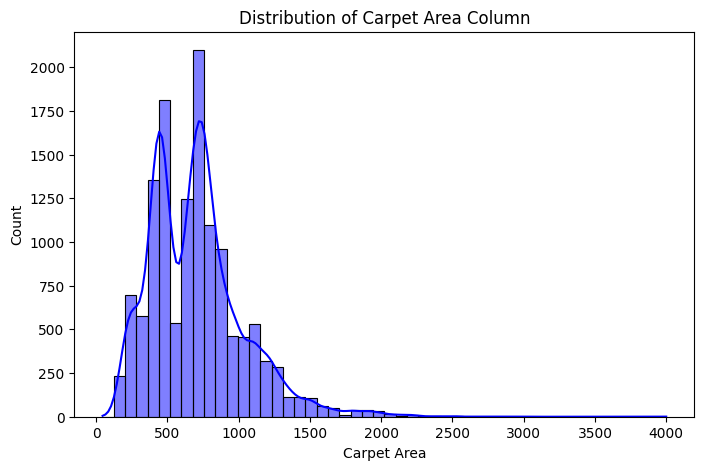

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df["Carpet_area(sq.ft)"], bins=50, kde=True, color="blue")  
plt.xlabel("Carpet Area")
plt.title("Distribution of Carpet Area Column") # Histogram and density curve

In [21]:
median_ca=df['Carpet_area(sq.ft)'].median()
avg_ca=df['Carpet_area(sq.ft)'].mean()
mod_ca=df['Carpet_area(sq.ft)'].mode()
median_bc,avg_bc,mod_bc 

(1.0,
 1.636571802420674,
 0    1.0
 dtype: float64)

In [22]:
df["Carpet_area(sq.ft)"].fillna(df["Carpet_area(sq.ft)"].mode()[1], inplace=True)

df["Carpet_area(sq.ft)"]

0         250.0
1        1400.0
2         850.0
3         425.0
4         800.0
          ...  
15381     750.0
15382     765.0
15383     920.0
15384    2100.0
15385    1900.0
Name: Carpet_area(sq.ft), Length: 15386, dtype: float64

In [23]:
missing_data=df.isnull().sum()
missing_data
#No more empty data

Locality                0
Type                    0
Rent/Month              0
Build_up_area(sq.ft)    0
Furnishing              0
Bathrooms               0
Balcony                 0
Parking                 0
Carpet_area(sq.ft)      0
dtype: int64

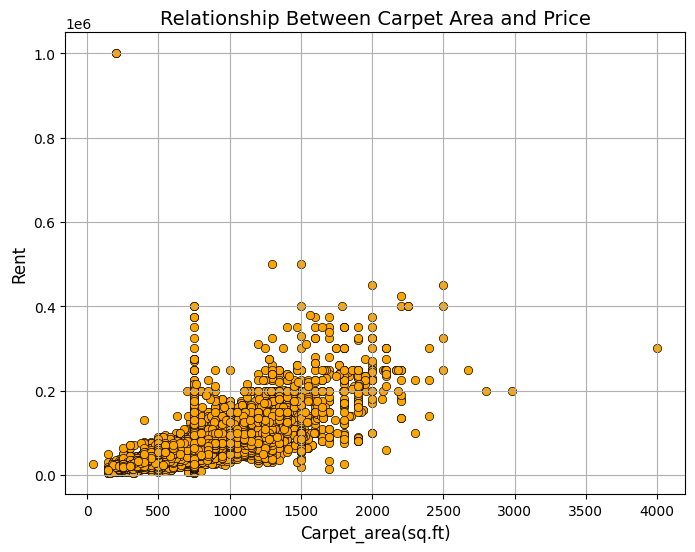

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Carpet_area(sq.ft)"], y=df["Rent/Month"], color="orange",edgecolor="black")
plt.xlabel("Carpet_area(sq.ft)", fontsize=12)
plt.ylabel("Rent", fontsize=12)
plt.title("Relationship Between Carpet Area and Price", fontsize=14)
plt.grid(True)

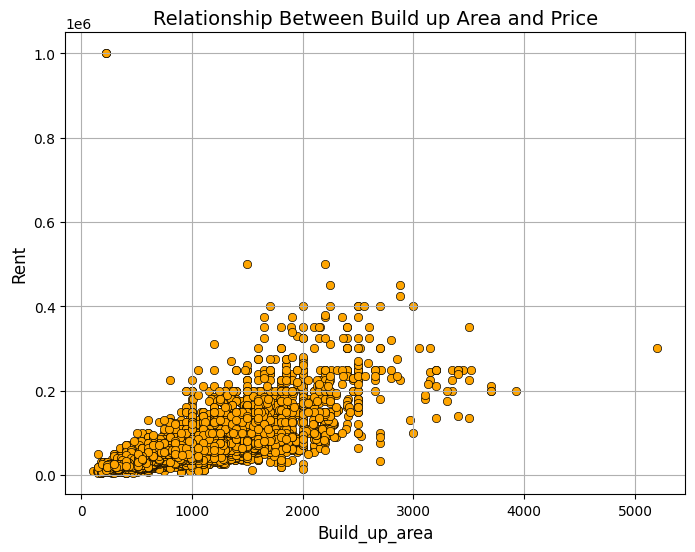

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Build_up_area(sq.ft)"], y=df["Rent/Month"], color="orange",edgecolor="black")
plt.xlabel("Build_up_area", fontsize=12)
plt.ylabel("Rent", fontsize=12)
plt.title("Relationship Between Build up Area and Price", fontsize=14)
plt.grid(True)
#These two data values give close results as expected.

In [26]:
#One-Hot Encoding
categorical_cols = ['Furnishing', "Locality"]  # örnek
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head(5), df.shape

(   Type  Rent/Month  Build_up_area(sq.ft)  Bathrooms  Balcony  Parking  \
 0   1.0       20000                 350.0        1.0      1.0      0.0   
 1   3.0      100000                1850.0        3.0      1.0      2.0   
 2   2.0       45000                1240.0        2.0      4.0      1.0   
 3   1.0       31500                 650.0        2.0      1.0      1.0   
 4   2.0       44000                1250.0        2.0      3.0      1.0   
 
    Carpet_area(sq.ft)  Furnishing_Semi Furnished  Furnishing_Unfurnished  \
 0               250.0                          1                       0   
 1              1400.0                          1                       0   
 2               850.0                          1                       0   
 3               425.0                          0                       1   
 4               800.0                          0                       1   
 
    Locality_Bandra  ...  Locality_Powai  Locality_Prabhadevi  \
 0                0

In [27]:
df.head(5)

,Type,Rent/Month,Build_up_area(sq.ft),Bathrooms,Balcony,Parking,Carpet_area(sq.ft),Furnishing_Semi Furnished,Furnishing_Unfurnished,Locality_Bandra,...,Locality_Powai,Locality_Prabhadevi,Locality_Santacruz,Locality_Sion,Locality_Tardeo,Locality_Vidyavihar,Locality_Vikhroli,Locality_Vile Parle,Locality_Wadala,Locality_Worli
0,1.0,20000,350.0,1.0,1.0,0.0,250.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,100000,1850.0,3.0,1.0,2.0,1400.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,45000,1240.0,2.0,4.0,1.0,850.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,31500,650.0,2.0,1.0,1.0,425.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,44000,1250.0,2.0,3.0,1.0,800.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,Type,Rent/Month,Build_up_area(sq.ft),Bathrooms,Balcony,Parking,Carpet_area(sq.ft)
Type,1.000000,0.601165,0.836486,0.793474,0.263634,0.318755,0.787878
Rent/Month,0.601165,1.000000,0.716734,0.571376,0.207003,0.271264,0.705673
Build_up_area(sq.ft),0.836486,0.716734,1.000000,0.758083,0.305039,0.355063,0.882520
Bathrooms,0.793474,0.571376,0.758083,1.000000,0.262363,0.291979,0.712099
Balcony,0.263634,0.207003,0.305039,0.262363,1.000000,0.254223,0.276173
Parking,0.318755,0.271264,0.355063,0.291979,0.254223,1.000000,0.320998
Carpet_area(sq.ft),0.787878,0.705673,0.882520,0.712099,0.276173,0.320998,1.000000


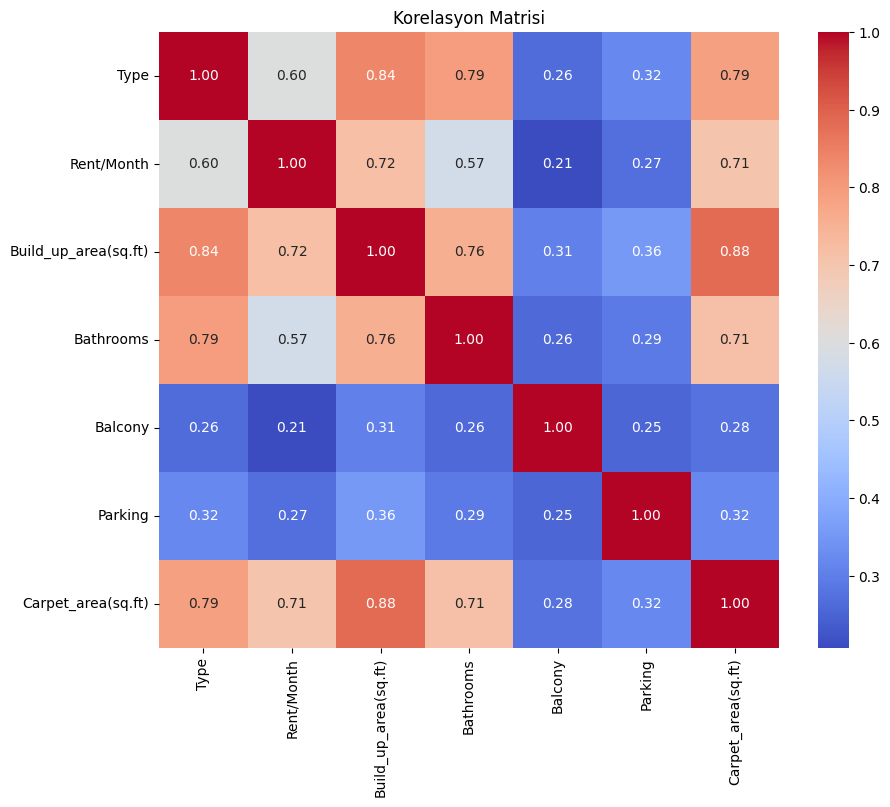

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()
#Balcony and Parking are not important for Price 

In [42]:
import numpy as np

df['log_rent'] = np.log(df['Rent/Month'])  # eğitimde bunu kullan


In [30]:
from sklearn.model_selection import train_test_split

In [43]:
#X = df.drop(columns=['Rent/Month'])
#y = df['Rent/Month']
X = df.drop(['Rent/Month', 'log_rent'], axis=1) 
y = df['log_rent'] 

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
print(f"Eğitim seti: {X_train.shape}, Test seti: {X_test.shape}")

Eğitim seti: (10770, 47), Test seti: (4616, 47)


# Linear Regression Model:

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [47]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred_lr = lr_model.predict(X_test)
errors_lr = y_test - y_pred_lr 

In [49]:
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f" Linear Regression R² Skoru: {r2_lr:.4f}")
print(f" Linear Regression MSE: {mse_lr:.2f}")
print(f" Linear Regression MAE: {mae_lr:.2f}")

######################################
#Without deleting Balcony: 
#Linear Regression R² Skoru: 0.7260
#Linear Regression MSE: 493148834.54
#Linear Regression MAE: 13553.60
######################################

#It didn't change even after deleting the balcony data.
#We'll Normalize it with Log


 Linear Regression R² Skoru: 0.8059
 Linear Regression MSE: 0.08
 Linear Regression MAE: 0.21


 Normalized version:
 Linear Regression R² Skoru: 0.8059
 Linear Regression MSE: 0.08
 Linear Regression MAE: 0.21

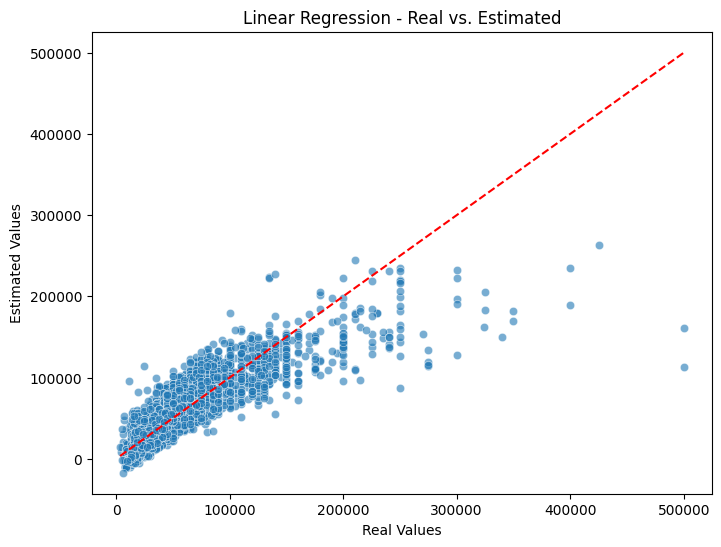

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45 derece doğrusu
plt.xlabel("Real Values")
plt.ylabel("Estimated Values")
plt.title("Linear Regression - Real vs. Estimated")
plt.show()

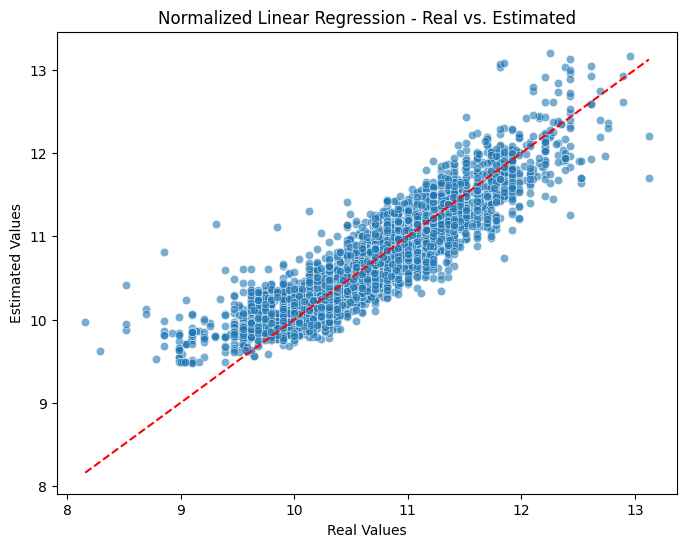

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45 derece doğrusu
plt.xlabel("Real Values")
plt.ylabel("Estimated Values")
plt.title("Normalized Linear Regression - Real vs. Estimated")
plt.show()

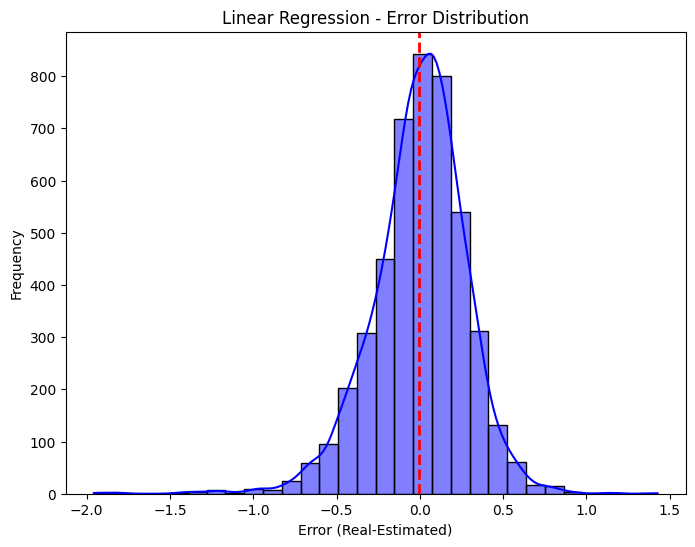

In [54]:
plt.figure(figsize=(8, 6))
sns.histplot(errors_lr, bins=30, kde=True, color="blue")
plt.axvline(errors_lr.mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Error (Real-Estimated)")
plt.ylabel("Frequency")

plt.title("Linear Regression - Error Distribution")
plt.show()

# Random Forest Model:

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [57]:
# Reducing overfitting in the Random Forest model

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=5, random_state=42)

In [58]:
y_pred_rf = rf_model.predict(X_test)

In [59]:
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f" Random Forest R² Skoru: {r2_rf:.4f}")
print(f" Random Forest MSE: {mse_rf:.2f}")
print(f" Random Forest MAE: {mae_rf:.2f}")

 Random Forest R² Skoru: 0.8321
 Random Forest MSE: 0.07
 Random Forest MAE: 0.19


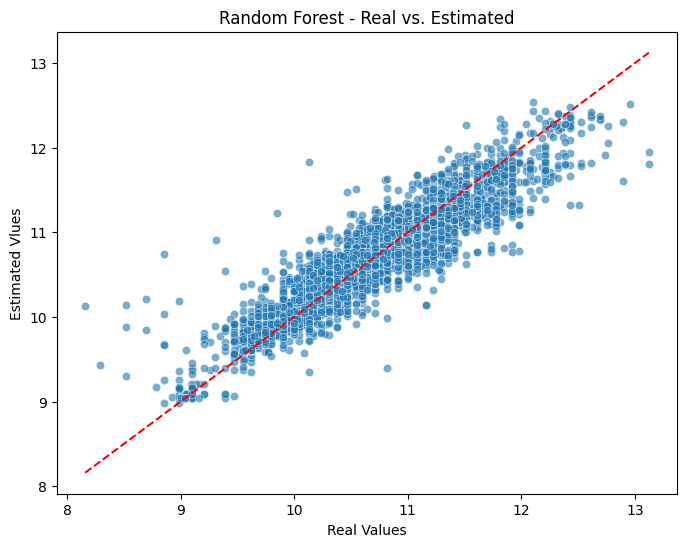

In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45 derece doğrusu
plt.xlabel("Real Values")
plt.ylabel("Estimated Vlues")
plt.title("Random Forest - Real vs. Estimated")
plt.show()

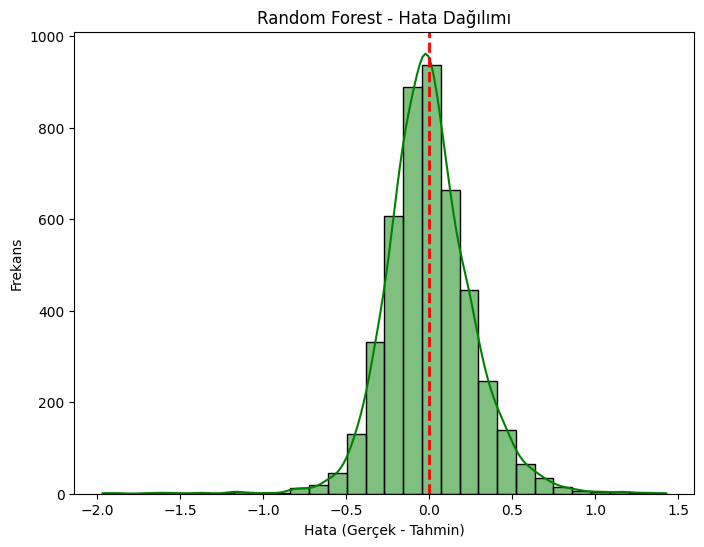

In [61]:
errors_rf = y_test - y_pred_rf

plt.figure(figsize=(8, 6))
sns.histplot(errors_rf, bins=30, kde=True, color="green")
plt.axvline(errors_rf.mean(), color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Hata (Gerçek - Tahmin)")
plt.ylabel("Frekans")
plt.title("Random Forest - Hata Dağılımı")
plt.show()

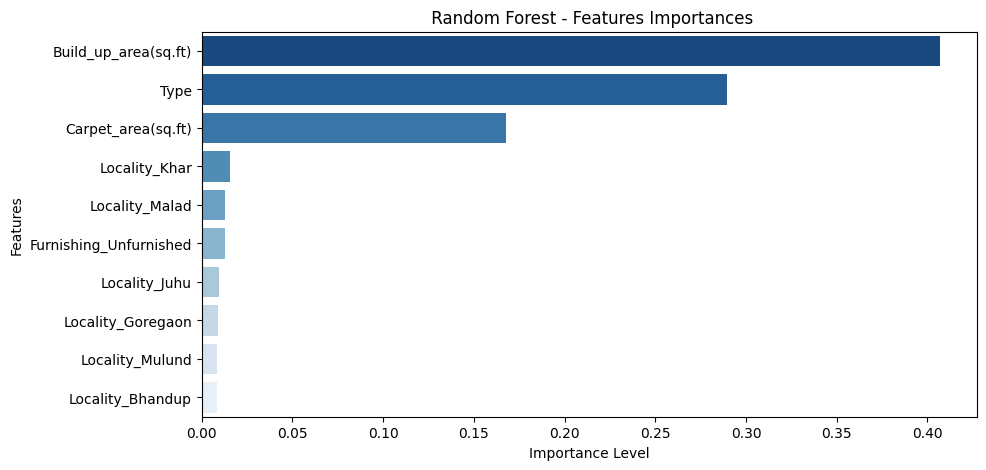

In [62]:
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

sorted_idx = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_idx]
sorted_features = feature_names[sorted_idx]

plt.figure(figsize=(10, 5))
sns.barplot(x=sorted_importances[:10], y=sorted_features[:10], palette="Blues_r")
plt.xlabel("Importance Level")
plt.ylabel("Features")
plt.title(" Random Forest - Features Importances")
plt.show()

# Decision Tree Model:

In [63]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [64]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [65]:
dt_model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)

In [66]:
y_pred_dt = dt_model.predict(X_test)

In [67]:
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print(f" Decision Tree R² Skoru: {r2_dt:.4f}")
print(f" Decision Tree MSE: {mse_dt:.2f}")
print(f" Decision Tree MAE: {mae_dt:.2f}")

 Decision Tree R² Skoru: 0.7361
 Decision Tree MSE: 0.11
 Decision Tree MAE: 0.25


[Text(0.5, 0.9166666666666666, 'Type <= 1.5\nsquared_error = 0.41\nsamples = 10770\nvalue = 10.686'),
 Text(0.25, 0.75, 'Build_up_area(sq.ft) <= 428.0\nsquared_error = 0.218\nsamples = 4218\nvalue = 10.17'),
 Text(0.125, 0.5833333333333334, 'Carpet_area(sq.ft) <= 249.5\nsquared_error = 0.205\nsamples = 1167\nvalue = 9.736'),
 Text(0.0625, 0.4166666666666667, 'Locality_Malad <= 0.5\nsquared_error = 0.224\nsamples = 436\nvalue = 9.513'),
 Text(0.03125, 0.25, 'Locality_Powai <= 0.5\nsquared_error = 0.224\nsamples = 345\nvalue = 9.612'),
 Text(0.015625, 0.08333333333333333, 'squared_error = 0.213\nsamples = 300\nvalue = 9.678'),
 Text(0.046875, 0.08333333333333333, 'squared_error = 0.077\nsamples = 45\nvalue = 9.171'),
 Text(0.09375, 0.25, 'Build_up_area(sq.ft) <= 226.5\nsquared_error = 0.047\nsamples = 91\nvalue = 9.139'),
 Text(0.078125, 0.08333333333333333, 'squared_error = 0.015\nsamples = 81\nvalue = 9.077'),
 Text(0.109375, 0.08333333333333333, 'squared_error = 0.029\nsamples = 10\nv

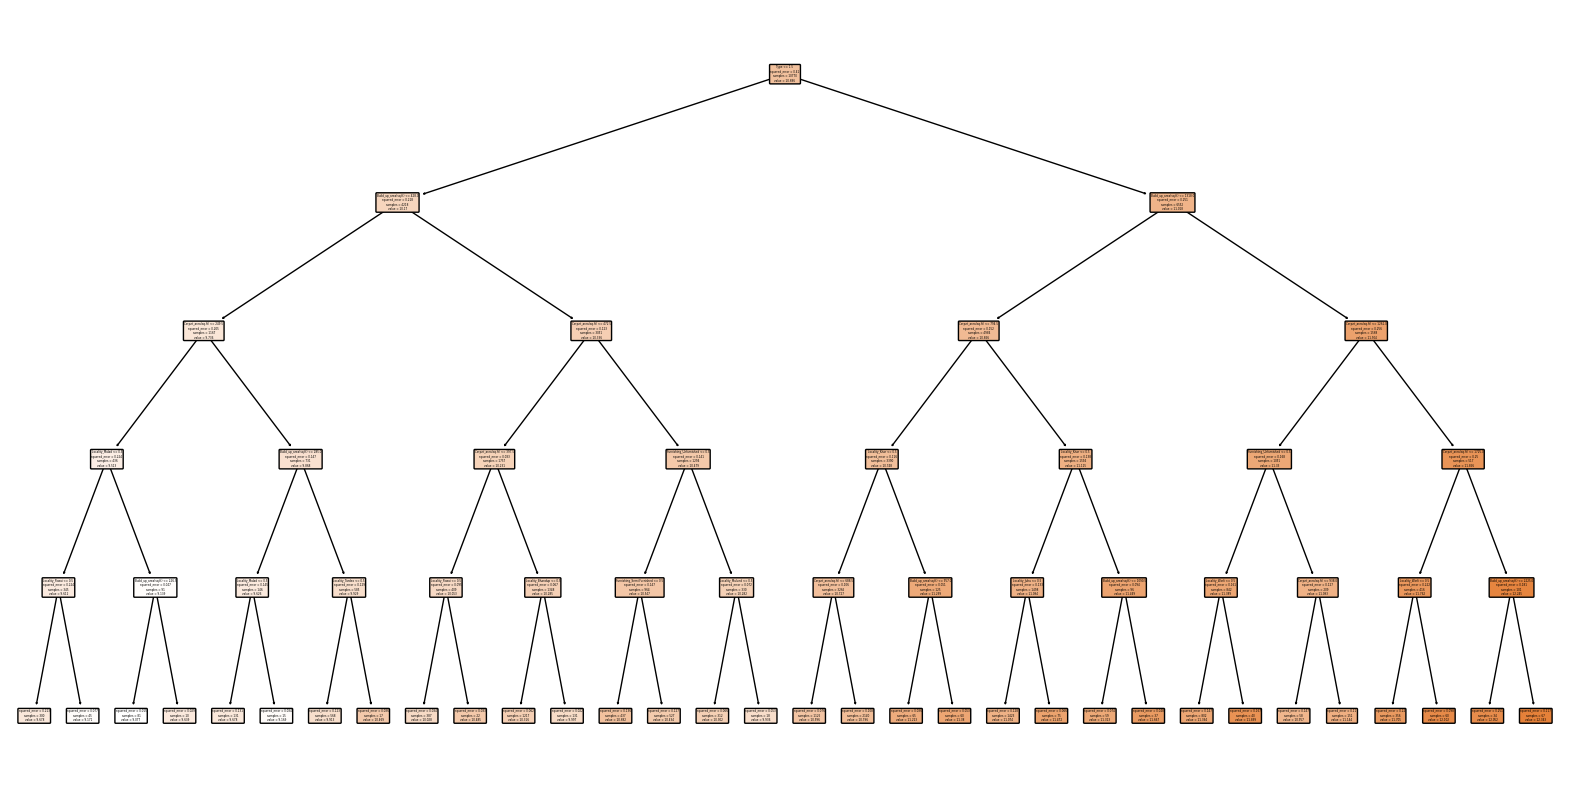

In [68]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True)

In [79]:
comparison = pd.DataFrame({
    "Model": ["Decision Tree", "Linear Regression", "Random Forest"],
    "R² Skoru": [r2_score(y_test, y_pred_dt), r2_lr, r2_score(y_test, y_pred_rf)],
    "MSE": [mean_squared_error(y_test, y_pred_dt), mse_lr, mean_squared_error(y_test, y_pred_rf)],
    "MAE": [mean_absolute_error(y_test, y_pred_dt), mae_lr, mean_absolute_error(y_test, y_pred_rf)]
})
comparison

,Model,R² Skoru,MSE,MAE
0,Decision Tree,0.736126,0.108744,0.253056
1,Linear Regression,0.805852,0.080010,0.212682
2,Random Forest,0.832073,0.069204,0.193811
